<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/Machine%20Learning/02_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn

sklearn.__version__

'1.0.2'

### INPUT DATA

In [ ]:
data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


Create backup file

In [ ]:
df=df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


### Check missing data / Sprawdzanie braków



In [ ]:
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [ ]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [ ]:
df.isnull().sum().sum()

5

In [ ]:
df.isnull().sum()/len(df)

size      0.166667
color     0.000000
gender    0.166667
price     0.166667
weight    0.333333
bought    0.000000
dtype: float64

# SimpleImputer / Uzupełnianie braków

In [ ]:
df['weight']

0    500.0
1    450.0
2    300.0
3      NaN
4    410.0
5      NaN
Name: weight, dtype: float64

In [ ]:
from sklearn.impute import SimpleImputer
# strategy: mean, median, most_frequent, constant
imputer=SimpleImputer(missing_values=np.nan, strategy ='mean')
imputer.fit(df[['weight']])


SimpleImputer()

In [ ]:
imputer.statistics_

array([415.])

In [ ]:
imputer.transform(df[['weight']])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [ ]:
df['weight']=imputer.transform(df[['weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


Fill missing data with constant value/ Uzupełnianie stałą wartościa

In [ ]:
imputer=SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99.0)
imputer.fit_transform(df[['price']])

array([[199.],
       [ 89.],
       [ 99.],
       [129.],
       [ 79.],
       [ 89.]])

In [ ]:
imputer=SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='L')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['M'],
       ['M']], dtype=object)

Fill missing data with most Frequent value/ Uzupełnianie najczęstszą wartościa

In [ ]:
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['M'],
       ['M'],
       ['M']], dtype=object)

Fill NAN / Wypełnianie NAN

In [ ]:
df.fillna(value='brak')

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [ ]:
df.fillna(value=0.0)

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,0.0,0.0,300.0,yes
3,0.0,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [ ]:
df['size']

0     XL
1      L
2      M
3    NaN
4      M
5      M
Name: size, dtype: object

In [ ]:
df['size'].fillna(value="L", inplace=True)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


### DROPNA / Usuniecie wszystkich brakow

In [ ]:
df.dropna()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
3,L,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [ ]:
df=df.dropna()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
3,L,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


## Time Series / Szeregi czasowe

In [ ]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


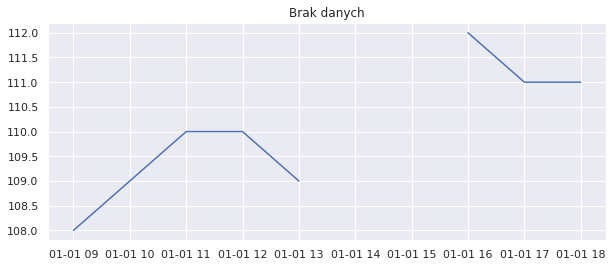

In [ ]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters
sns.set()

plt.figure(figsize=(10,4))
plt.title('Brak danych')
plt.plot(df.price)
plt.show()

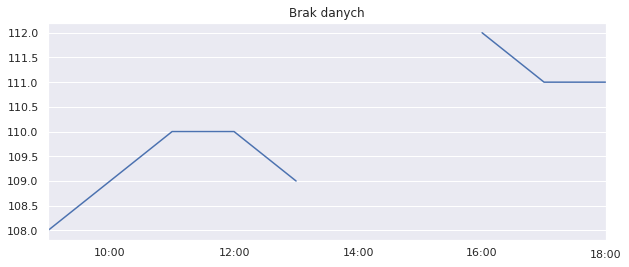

In [ ]:
df['price'].plot(figsize=(10,4),title="Brak danych" ) # another way to show the plot

In [ ]:
import plotly.express as px

df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width=600, height=400, 
        title='Szeregi czasowe - braki danych')

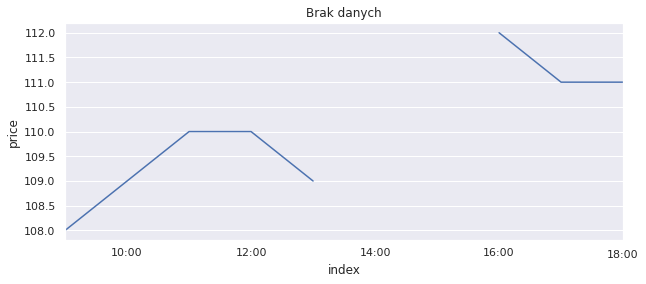

In [ ]:
df['price'].plot(figsize=(10,4),title="Brak danych",xlabel='index',ylabel='price'  ) # another way to show the plot

Remove missing data / Usunięcie braków

In [ ]:
df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index', 'price', width=600, height=400, 
        title='Szeregi czasowe - braki danych')

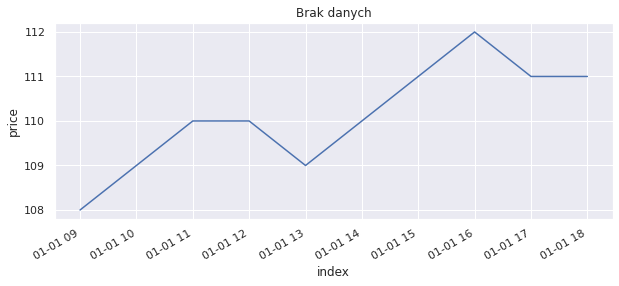

In [ ]:
df['price'].dropna().plot(figsize=(10,4),title="Brak danych",xlabel='index',ylabel='price'  ) # another way to show the plot

###fill constant value 0 / Wypełnienie braków stała wartoscia 0


In [ ]:
df_plotly=df.reset_index()
df_plotly['price_fill']=df_plotly['price'].fillna(0)
px.line(df_plotly,'index','price_fill',width=600,height=400, title='Szeregi czasowe - wartość 0')

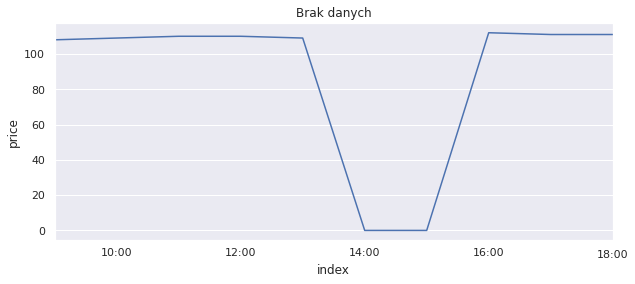

In [ ]:
df['price'].fillna(0).plot(figsize=(10,4),title="Brak danych",xlabel='index',ylabel='price'  ) # another way to show the plot

Fill missing value with average value / Wypełnienie braków średnią

In [ ]:
df_plotly=df.reset_index()
df_plotly['price_fill']=df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly,'index','price_fill',width=600,height=400, title='Szeregi czasowe - wartość srednia')

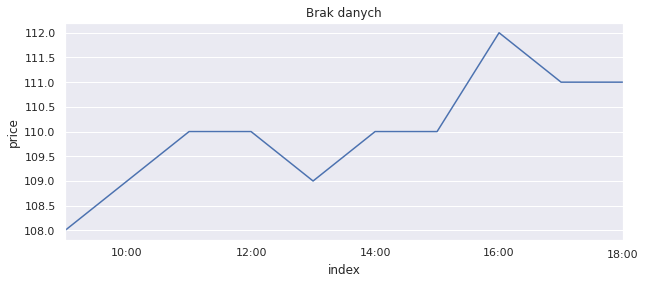

In [ ]:
df['price'].fillna(df['price'].mean()).plot(figsize=(10,4),title="Brak danych",xlabel='index',ylabel='price'  ) # another way to show the plot

### Interpolation / INterpolacja

In [ ]:
df_plotly=df.reset_index()
df_plotly['price_fill']=df_plotly['price'].interpolate()
px.line(df_plotly,'index','price_fill',width=600,height=400, title='Szeregi czasowe - wartość interpolacji')

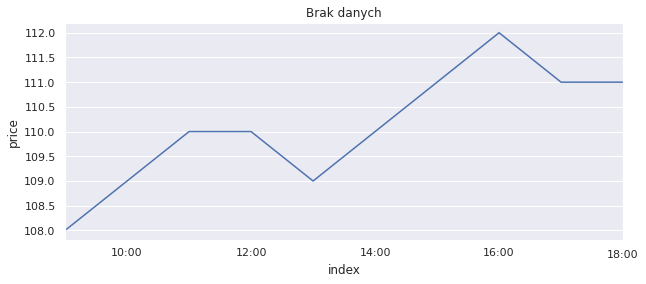

In [ ]:
df['price'].interpolate().plot(figsize=(10,4),title="Brak danych",xlabel='index',ylabel='price'  ) # another way to show the plot

### Farward fill / Wypełnienie metodą farward fill

In [ ]:
df_plotly=df.reset_index()
df_plotly['price_fill']=df_plotly['price'].fillna(method='ffill')
px.line(df_plotly,'index','price_fill',width=600,height=400, title='Szeregi czasowe - wartość forward fill')


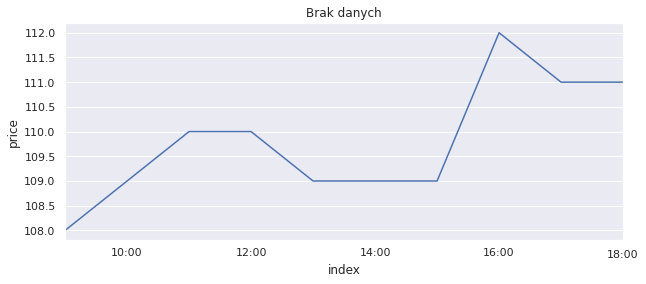

In [ ]:
df['price'].fillna(method='ffill').plot(figsize=(10,4),title="Brak danych",xlabel='index',ylabel='price'  ) # another way to show the plot

#Backward fill / Metoda backward fill

In [ ]:
df_plotly=df.reset_index()
df_plotly['price_fill']=df_plotly['price'].fillna(method='bfill')
px.line(df_plotly,'index','price_fill',width=600,height=400, title='Szeregi czasowe - wartość backward fill')

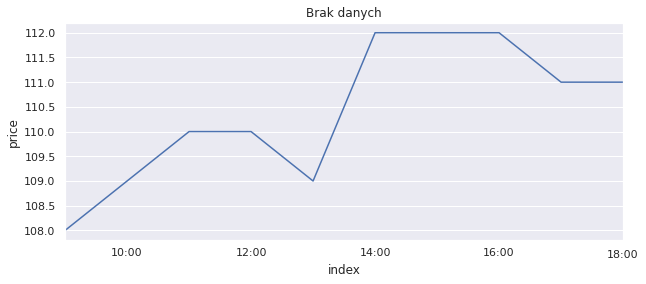

In [ ]:
df['price'].fillna(method='bfill').plot(figsize=(10,4),title="Brak danych",xlabel='index',ylabel='price'  ) # another way to show the plot